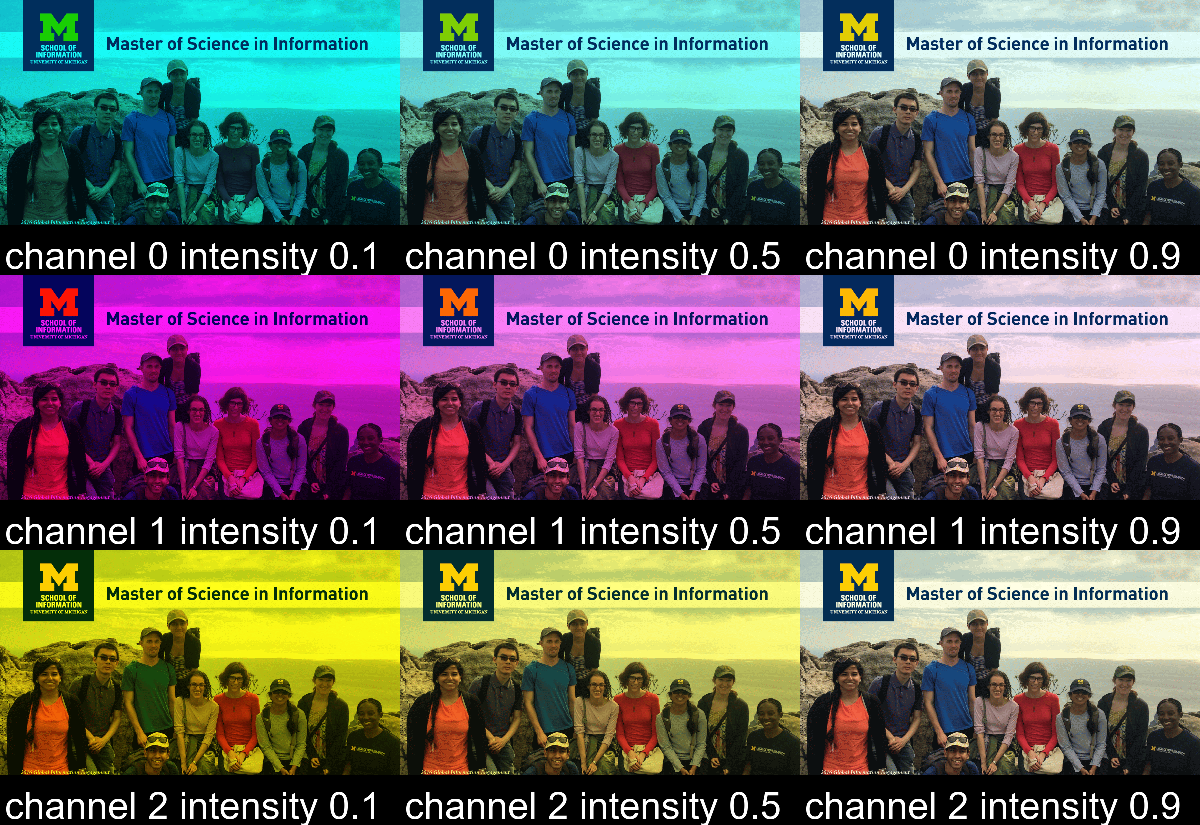

In [8]:
import PIL

from PIL import Image

from PIL import ImageDraw
from PIL import ImageFont
from IPython.display import display

# read image and convert to RGB
image = Image.open("msi_recruitment.gif")
image = image.convert('RGB')

width, height = image.size

newImg = PIL.Image.new(image.mode, (width, (height + 100)))
newImg.paste(image, (0, 0))

def drawText(color, intensity,imag):
    text="channel {} intensity {}".format(color, intensity)
    font = ImageFont.truetype("arial.ttf", 75)  
    Draw=ImageDraw.Draw(imag)
    Draw.text((10,470), text, fill="white", font=font, align="left") 

def setIntensity(aitensity, img, color):
    newImage = PIL.Image.new(img.mode, (newImg.width, newImg.height))

    for row in range(height):
        for col in range(width):
            p = img.getpixel((col, row))
            if color == 0:
                newImage.putpixel((col, row), (int(p[0]*aitensity),p[1],p[2]))
            elif color == 1:
                newImage.putpixel((col, row), (p[0],int(p[1]*aitensity),p[2]))    
            elif color == 2:
                newImage.putpixel((col, row), (p[0],p[1],int(p[2]*aitensity)))    
    return newImage

intensity = [0.1, 0.5, 0.9]
colors=[0,1,2] #"red","green","blue" channel respectively
images = []

for color in colors:
    for i in intensity:
        images.append(setIntensity(i,newImg,color))
        drawText(color,i,images[-1])

contact_sheet=PIL.Image.new(newImg.mode, (newImg.width*3,(newImg.height)*3))
x=0
y=0

for img in images:
    contact_sheet.paste(img, (x, y) )

    if x+newImg.width == contact_sheet.width:
        x=0
        y=y+newImg.height
    else:
        x=x+newImg.width

# resize and display the contact sheet
contact_sheet = contact_sheet.resize((int(contact_sheet.width/2),int(contact_sheet.height/2) ))
display(contact_sheet)